# Finding the number of clusters in selected dataset with certainty score for each sample and cluster class mapping 

1. What is the data ? 

The dataset is some selected samples from DynamicWorld dataset. It is a Sentinel2 dataset. 


In [3]:
from skimage import io
import glob
import numpy as np
import os
import cv2
import PIL
from PIL import Image
import skimage
from skimage import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
import numpy as np
from pathlib import Path
txt = Path('C:\\Users\\karm_ch\\Documents\\autocoast\\images_of_consideration.txt').read_text()
#print((txt))

In [ ]:
#https://www.helmholtz.ai/themenmenue/you-helmholtz-ai/computing-resources/index.html

In [3]:
lst = []
with open('C:\\Users\\karm_ch\\Documents\\autocoast\\images_of_consideration.txt', 'r') as f: #open the file 
    lines = f.readlines() # combine lines of file in a list
    for item in lines: # iterate through items of  lines
        # iterate through items in each line and remove extra space after last item in the line using strip method
        #print (item)
        if ".tif" in item : 
            lst.append(item.strip(".tif\n"))
        if ".png" in item : 
            lst.append(item.strip(".png\n"))
        
        #for names in item.strip(".tif"): 
            #lst.append(names) # append digits in to the list and convert them to int
#print((lst))

In [4]:
print(len(lst))

210


In [5]:
folder="C:\\Users\\karm_ch\\Documents\\autocoast\\data\\s2raw"

import os
lst_1=os.listdir(folder)

#from glob import glob
#lst_1=glob(folder + "/*/", recursive = True)

In [6]:
lst_2=[]
for i in range (len(lst_1)): 
    for text in lst:
        if text in lst_1[i]: 
            lst_2.append(lst_1[i])
        

In [1]:
#new_folder= "C:\\Users\\karm_ch\\Documents\\autocoast\\data\\s2raw\\selected_samples"
new_folder= "C:\\Users\\karm_ch\\Documents\\autocoast\\baltic_sea_data\\random_s2a\\s2a_540x540_raw_random"
#label_folder="C:\\Users\\karm_ch\\Documents\\autocoast\\data\\label"
#for file in lst_2: 
    #os.rename(folder + "\\" + file, new_folder+ "\\" + file)

In [16]:


# band descriptions here: https://sentinels.copernicus.eu/web/sentinel/user-guides/sentinel-2-msi/processing-levels/level-2
# paper :https://www.nature.com/articles/s41597-022-01307-4#Sec8
num_of_samples=0
data=[]
labels=[]

i=0
for folder in glob.glob(new_folder+ "\\*") :
    print(folder + "____________________________________________________________________________________________")
    os.chdir(folder)
    print("in")
    tif_np=np.zeros((540 * 540 , 4))
    i=0
    for file in glob.glob(folder + "\\*"): 
        
        split_up=os.path.splitext(file)
        #print(split_up[1])
        if ((split_up[1] ==".tif" or split_up[1]==".tiff") and ("B02_10m" in file or "B03_10m" in file or "B04_10m" in file or "B08_10m" in file)): 
            #print(file)

            im=io.imread(file)[0:540,0:540]
            print(im.shape)
            tif_np[:,i]=im.reshape(540 * 540)
            i+=1
        #if(im.shape == (510,510) and ("B2.tif" in file or "B3.tif" in file or "B4.tif" in file or "B8.tif" in file)): 
            #print(file) 
            #print(im.shape)
            #tif_lst.append(im) # the order is B2 B3 B4 B8
        #img_stacked[i,:,:]=im[0:510,0:510]
        #i+=1
    #print(folder+"\\*.TCI_B.tif")
    os.chdir("..")
    num_of_samples+=1
    data.append(tif_np)
    
    
    # now get the label tif from the label folder
    #for labelfilename in  glob.glob(label_folder + "\\*"):
    
        #file_name, file_extension = os.path.splitext(os.path.basename(labelfilename))
        #if (file_extension == ".tif" and file_name in folder):
            #print("label here ******************")
            #label_np= io.imread(labelfilename)
            #print(file_name,label_np.shape)
            #labels.append(label_np) 
        #else:
            #print("not here")
    #blue_band= io.imread(folder+"*.TCI_B.tif")
    


C:\Users\karm_ch\Documents\autocoast\baltic_sea_data\random_s2a\s2a_540x540_raw_random\002c286b-96b1-4cbb-8b13-bf990ae925d8_f88ba299129f7d5ac4a83bee0659985b679ec765809aff828e95e6f01a34f3e9____________________________________________________________________________________________
in
(540, 540)
(540, 540)
(540, 540)
(540, 540)
C:\Users\karm_ch\Documents\autocoast\baltic_sea_data\random_s2a\s2a_540x540_raw_random\0537e5f4-235a-5958-be97-126ef6902777_c7095150e0692db0b2b6da8bdb82a4ef3acde6d2f21f2e2edbf141bf8687ce30____________________________________________________________________________________________
in
(540, 540)
(540, 540)
(540, 540)
(540, 540)
C:\Users\karm_ch\Documents\autocoast\baltic_sea_data\random_s2a\s2a_540x540_raw_random\0537e5f4-235a-5958-be97-126ef6902777_eeb285c69f59b33eaf57d242ae8d8888284cbf179bdfdb3b74fb4199980b7ac8____________________________________________________________________________________________
in
(540, 540)
(540, 540)
(540, 540)
(540, 540)
C:\Users\karm_ch

(540, 540)
(540, 540)
C:\Users\karm_ch\Documents\autocoast\baltic_sea_data\random_s2a\s2a_540x540_raw_random\2687dfdb-c254-5909-a517-484b78a33812_9d5ebe6b8c15095e233ab9734e80162cf21888366e8c4384b5c9b89ca6eb580a____________________________________________________________________________________________
in
(540, 540)
(540, 540)
(540, 540)
(540, 540)
C:\Users\karm_ch\Documents\autocoast\baltic_sea_data\random_s2a\s2a_540x540_raw_random\29abcd78-c4cf-512e-b1d4-6e96a22f82a2_8018e021c4f0463c750018eb05d8d78ee054d6016af8f14242a0390dde5aa4bf____________________________________________________________________________________________
in
(540, 540)
(540, 540)
(540, 540)
(540, 540)
C:\Users\karm_ch\Documents\autocoast\baltic_sea_data\random_s2a\s2a_540x540_raw_random\29eac03e-6749-45e0-8c22-d9c8a54784fd_4869b205ddaecee6def5da5317ac3f24cf43f57567fa1dae151881c30c4ca05c____________________________________________________________________________________________
in
(540, 540)
(540, 540)
(540, 540)
(540,

C:\Users\karm_ch\Documents\autocoast\baltic_sea_data\random_s2a\s2a_540x540_raw_random\74c0f0dd-77b7-5d3f-ab49-6635d0d195fa_105a60ecf2a4321d9b58e760c2523ec41fe3d79a3d865227942c5b737d8f0af7____________________________________________________________________________________________
in
(540, 540)
(540, 540)
(540, 540)
(540, 540)
C:\Users\karm_ch\Documents\autocoast\baltic_sea_data\random_s2a\s2a_540x540_raw_random\7ce9be4e-15b5-5c46-b5f4-11e35befface_01c582754f335dc8e284d609bd360d23749cca441ff49c75d270b867ee84cb92____________________________________________________________________________________________
in
(540, 540)
(540, 540)
(540, 540)
(540, 540)
C:\Users\karm_ch\Documents\autocoast\baltic_sea_data\random_s2a\s2a_540x540_raw_random\7ce9be4e-15b5-5c46-b5f4-11e35befface_e1abc49c273a0ce575d3f2efbb8ff24d15f1b65213d19460916c1e483a74f9fb____________________________________________________________________________________________
in
(540, 540)
(540, 540)
(540, 540)
(540, 540)
C:\Users\karm_ch

C:\Users\karm_ch\Documents\autocoast\baltic_sea_data\random_s2a\s2a_540x540_raw_random\eab760b9-5011-55bc-b361-d0cc37e47bce_439f82c6e648d4638c430f847906918dff49bf78574dd545a353ab40ec6fc2d5____________________________________________________________________________________________
in
(540, 540)
(540, 540)
(540, 540)
(540, 540)
C:\Users\karm_ch\Documents\autocoast\baltic_sea_data\random_s2a\s2a_540x540_raw_random\f015c1b0-4607-5fad-928d-2474416a1093_b4290434fdb4067a4c78af23c3ea2801e355028fa3380efdd858bcfda96c8402____________________________________________________________________________________________
in
(540, 540)
(540, 540)
(540, 540)
(540, 540)
C:\Users\karm_ch\Documents\autocoast\baltic_sea_data\random_s2a\s2a_540x540_raw_random\f06a4240-b4f8-563f-8420-5221583bd791_50b08a4c4342e6c5a0db9c0f98f82f11f4817c4725b1a8baf9f4a34be3dd48ad____________________________________________________________________________________________
in
(540, 540)
(540, 540)
(540, 540)
(540, 540)
C:\Users\karm_ch

In [22]:
data=np.array(data)

In [23]:
data[0].shape

(291600, 4)

In [24]:
data_rszd= data.reshape((99 * 291600 , 4))

In [25]:
np.savetxt('baltic_data.txt', data_rszd, fmt='%d')


In [26]:
data_baltic=data_rszd

In [24]:
labels_np = np.array(labels)

In [25]:
labels_np.shape

(193, 510, 510)

In [26]:
np.savetxt('labels_np_correct.txt', labels_np.reshape(labels_np.shape[0], labels_np.shape[1] * labels_np.shape[2]), fmt='%d')

In [47]:
data_np= np.array(data)
data_np = data_np.reshape(data_np.shape[0] * data_np.shape[1] , data_np.shape[2])

In [48]:
data_np.shape

(50199300, 4)

In [19]:
np.savetxt('data_np_correct.txt', data_np.reshape(data_np.shape[0] * data_np.shape[1] , data_np.shape[2]), fmt='%d')

# load  the data

In [3]:
data_npy=np.loadtxt("C:\\Users\\karm_ch\\Documents\\autocoast\\data\\s2raw\\data_np\\data_np_correct.txt")
#print(data_npy.shape)

In [4]:
first_20_samples= 20 * 510 *510

In [5]:
data_npy= data_npy[0:first_20_samples]

In [6]:
data_npy.shape

(5202000, 4)

# what does the data look like ?

## band B2

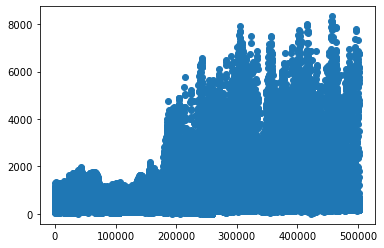

In [10]:
import matplotlib.pyplot as plt

plt.scatter(np.arange(data_npy.shape[0]),data_npy[:,0])
#plt.scatter(5000, 750, color='red')

plt.show()

# band b3

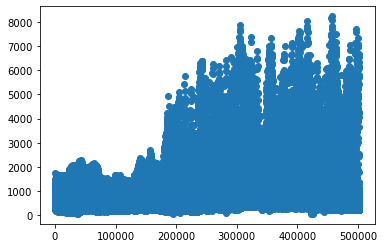

In [12]:

plt.scatter(np.arange(data_npy.shape[0]),data_npy[:,1])
#plt.scatter(5000, 750, color='red')

plt.show()

# band b4

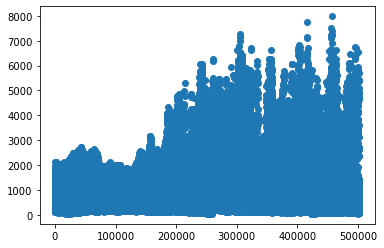

In [14]:

plt.scatter(np.arange(data_npy.shape[0]) ,data_npy[:,2])
#plt.scatter(5000, 750, color='red')

plt.show()

# band b8

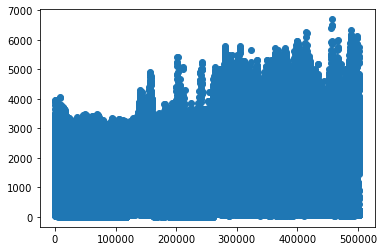

In [17]:

plt.scatter(np.arange(data_npy.shape[0]) , data_npy[:,3])
#plt.scatter(5000, 750, color='red')

plt.show()

# band correlation plot

# Finding the optimal number of clusters in the dataset

# Trial 1: Elbow visulalizer

In [45]:
dataset=data_baltic[0:30000]
print(dataset.shape)

(30000, 4)


122


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


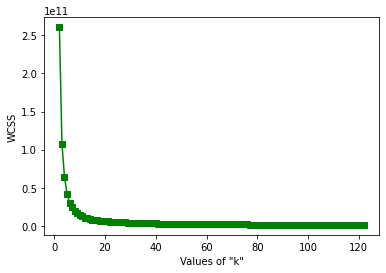

In [46]:

# determining the maximum number of clusters
# using the simple method
limit = int((dataset.shape[0]//2)**0.5)
print(limit)

# selecting optimal value of 'k'
# using elbow method

# wcss - within cluster sum of
# squared distances
wcss = {}

for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset)
    wcss[k] = model.inertia_

# plotting the wcss values
# to find out the elbow value
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

# some experiments with k-means initialization

# Trial 2: Silhouette plots

Silhouette Score = (b-a)/max(a,b)

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

In [32]:
# determining the maximum number of clusters
# using the simple method
imit = 20 # int((dataset.shape[0]//2)**0.5)

obs= np.zeros((limit+2))

# determining number of clusters
# using silhouette score method
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset)
    pred = model.predict(dataset)
    score = silhouette_score(dataset, pred)
    obs[k]=score 
    
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 2: 0.732


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 3: 0.644


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 4: 0.614


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 5: 0.554


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 6: 0.545


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 7: 0.518


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 8: 0.515


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 9: 0.516


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 10: 0.501


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 11: 0.497


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 12: 0.479


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 13: 0.477


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 14: 0.458


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 15: 0.419


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 16: 0.429


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 17: 0.415


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 18: 0.403


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 19: 0.396


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 20: 0.384


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 21: 0.396


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 22: 0.388


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 23: 0.391


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 24: 0.376


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 25: 0.383


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 26: 0.374


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 27: 0.367


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 28: 0.365


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 29: 0.367


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 30: 0.358


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 31: 0.351


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 32: 0.340


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 33: 0.356


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 34: 0.342


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 35: 0.343


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 36: 0.342


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 37: 0.339


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 38: 0.344


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 39: 0.339


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 40: 0.333


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 41: 0.327


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 42: 0.339


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 43: 0.331


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 44: 0.319


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 45: 0.329


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 46: 0.333


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 47: 0.322


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 48: 0.312


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 49: 0.320


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 50: 0.319


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 51: 0.318


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 52: 0.323


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 53: 0.313


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 54: 0.314


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 55: 0.309


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 56: 0.315


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 57: 0.315


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 58: 0.311


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 59: 0.311


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 60: 0.309


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 61: 0.320


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 62: 0.309


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 63: 0.306


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 64: 0.301


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 65: 0.313


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 66: 0.299


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 67: 0.302


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 68: 0.309


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 69: 0.302


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 70: 0.306


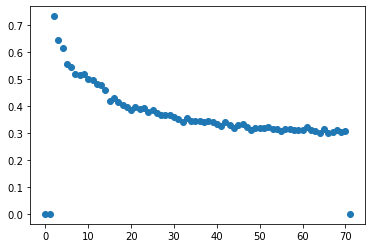

In [33]:
plt.scatter(np.arange(obs.shape[0]), obs)

# Gaussian mixture model

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

# Trial 3 : Using Bayesian Information Criteria to select the number of clusters (GM Model selection)

In [34]:
import numpy as np
#read the data
#data_npy=np.loadtxt("C:\\Users\\karm_ch\\Documents\\autocoast\\data\\s2raw\\data_np\\data_np_correct.txt")
#print(data_npy.shape)
#dataset=data_npy#[0:10000]

In [54]:
dataset=data_baltic

In [55]:
dataset.shape

(28868400, 4)

In [48]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
X=dataset

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 20),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(dataset)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 20)},
             scoring=<function gmm_bic_score at 0x000001B102F4E0D0>)

In [49]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
60,4,full,338836.571834
61,5,full,338931.279138
59,3,full,339440.822496
66,10,full,339604.942085
63,7,full,339647.775985


In [50]:
grid_search

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 20)},
             scoring=<function gmm_bic_score at 0x000001B102F4E0D0>)

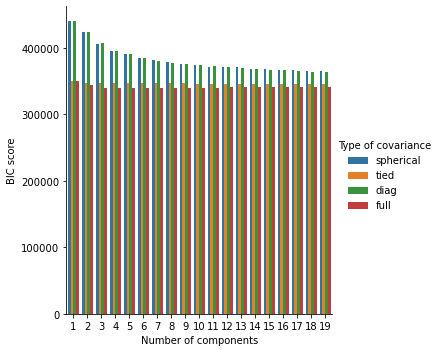

In [51]:
import seaborn as sns

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

# comment on covariance types in BIC computation _Nina

# results from GMM - cluster labels

In [56]:

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=10, random_state=0).fit(dataset)

gm_labels=gm.predict(dataset)

In [57]:
gm_labels.shape

(28868400,)

In [58]:
np.savetxt("gmlabels_baltic.txt",gm_labels,fmt="%d")
print(" GMM labels Baltic saved")

 GMM labels Baltic saved


In [59]:
gm_certainty= gm.predict_proba(dataset) 

In [60]:
gm_certainty[0]

array([0.00000000e+00, 2.06127408e-01, 0.00000000e+00, 0.00000000e+00,
       5.02259332e-03, 5.58714162e-87, 8.46199066e-66, 5.89761292e-01,
       1.45775361e-08, 1.99088692e-01])

In [61]:
gm_certainty[0].sum()

1.0000000000000029

In [16]:
#gm_uncertainty=1-gm_certainty

In [21]:
#gm_uncertainty[0].sum()

9.0

In [20]:
gm_labels[0]

6

In [62]:
np.savetxt("gm_certainty_baltic.txt",gm_certainty,fmt="%f")
print(" GMM ceratinty scores Baltic saved")

 GMM ceratinty scores Baltic saved


In [19]:
gm_labels[0]

6

In [ ]:
#Probability that the test samples were drawn from that cluster
gm.predict_proba(test_data)

# choice 2: xmeans 

determination of the initial cluster center point is the weakness of the K-Means algorithm. This is because there is no approach used in selecting and determining the cluster center point. The cluster center point is chosen arbitrarily or randomly from a set of data. The clustering results of the K-Means algorithm are often not optimal and not optimal in every conducted experiment. Therefore, it can be said that the good and bad results of clustering depend on the center point of the cluster or the initial centroid.

X-means goes into action after each run of K-means, making local decisions about which subset of the current centroids should split themselves to attain a better fit. The splitting decision is done by computing the Bayesian Information Criterion (BIC).

In [5]:
import pyclustering
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES

In [32]:
data=list(dataset) # just because this kmeans implementation inputs lists of samples
print(len(data[0]))

4


Total WCE: 309292810.38165814


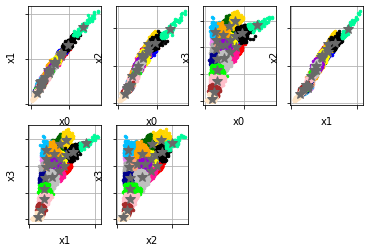

In [37]:
from pyclustering.cluster import cluster_visualizer_multidim
# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(data, amount_initial_centers).initialize()
 
# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(data, initial_centers, 20)
xmeans_instance.process()
 
# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
 
# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())
 
# Visualize clustering results
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, data)
visualizer.append_cluster(centers, None, marker='*', markersize=10)
visualizer.show()

# Results from XMeans - cluster lables 

# Results from Kmeans - cluster labels

In [13]:

data_np= data_npy[0:40000] #np.zeros((num_of_samples, 510 * 510 , 4))

#cluster the data (dta_array) 

feat_mat=data_np #.reshape(data_np.shape[0] * data_np.shape[1], data_np.shape[2]) # data_np.shape[0] is the njumber of samples 
                                                                                #data_np.shape[1] is the patch size of sample
                                                                                #data_np.shape[2] is the number of bands
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(feat_mat)
kmeanslabels = kmeans.labels_

#labels_per_sample= kmeanslabels.reshape(data_np.shape[0], data_np.shape[1])
centroids=cluster_centers_#np.loadtxt("C:/12months/centroids_19_18_labels_50words.txt")
#random_kmeanslabels=nearest_centroids(feat_mat,centroids)

    

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
kmeanslabels.shape[0] / data_np.shape[0]

1.0

In [23]:
centroids=kmeans.cluster_centers_

In [26]:
centroids.shape

(10, 4)

In [25]:
#np.savetxt("centroilds.txt",centroids,fmt="%d")

In [41]:
data_np.shape

(40000, 4)

In [22]:
#np.savetxt("kmeanslabels.txt",kmeanslabels,fmt="%d")
#print(" kmeans labels saved")

# Plotting the clusters - Kmeans

In [28]:
from sklearn.decomposition import PCA

#data_np= data_np.reshape(data_np.shape[0] * data_np.shape[1], data_np.shape[2])

pca = PCA(2)
df = pca.fit_transform(data_np[0:200])

In [29]:
df.shape

(200, 2)

In [18]:

#predict the labels of clusters.


C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


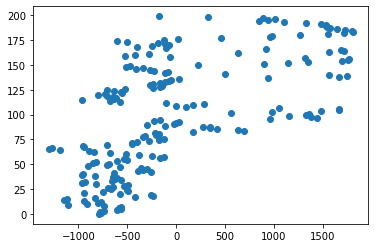

In [31]:
#import matplotlib.pyplot as plt

plt.scatter(df[:,0], np.arange(df.shape[0]))
#plt.scatter()

plt.show()

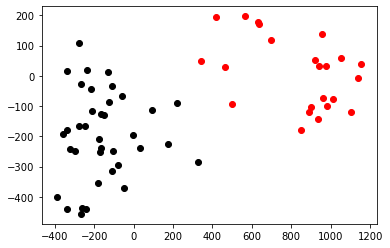

In [42]:
#filter rows of original data
filtered_label2 = df[label == 2]
 
filtered_label8 = df[label == 4]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

In [44]:
filtered_label2.shape

(23, 2)

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


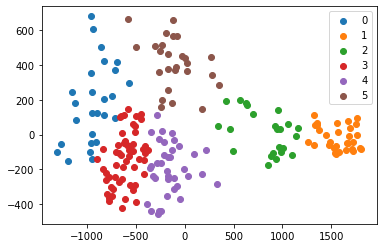

In [33]:
#Getting unique labels
import matplotlib.pyplot as plt

label = kmeans.fit_predict(df)

u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [36]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

N = 500
X0 = np.random.normal(np.repeat(np.random.uniform(0, 20, 20), N), 3)
X1 = np.random.normal(np.repeat(np.random.uniform(0, 10, 20), N), 2)
X = np.vstack([X0, X1]).T
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters).fit(X)

colors = ['red', 'blue', 'purple', 'green']
ax = sns.scatterplot(X[:, 0], X[:, 1], hue=kmeans.labels_, palette=colors, alpha=0.5, s=7)
ax = sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],hue=range(num_clusters), palette=colors, s=20, ec='black', legend=False, ax=ax)
plt.show()

C:\Users\karm_ch\AppData\Local\Continuum\anaconda3\envs\gdal_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given